In [179]:
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import linalg as LA
from scipy.sparse.linalg import svds, eigs
from sklearn.decomposition import PCA,TruncatedSVD
from scipy import linalg
import pandas as pd

In [ ]:
datadir = '/home/garner1/Work/dataset/SSF/prostate-twelve/'
section = 'P1.2'
# section = 'sample1.2_deconvolution'
filename = datadir+section+'.tsv'
df = pd.read_csv(filename, sep='\t', header=0, index_col=0) # read the gene X position count-matrix
data = df.values
u, s, vt = svds(csc_matrix(data).asfptype(), k=10,which='LM')

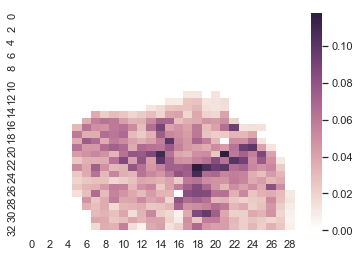

In [208]:
vec = abs(vt[-1,:])

spatialCoord = [w.split('x') for w in list(df.columns.values)]
spatialCoord = [map(int,pairs) for pairs in spatialCoord]
i = [l[0] for l in spatialCoord]
j = [l[1] for l in spatialCoord]

mat = coo_matrix((vec, (i, j)), [max(i)+1, max(j)+1]).todense()

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = sns.heatmap(mat,annot=False,cmap=cmap)

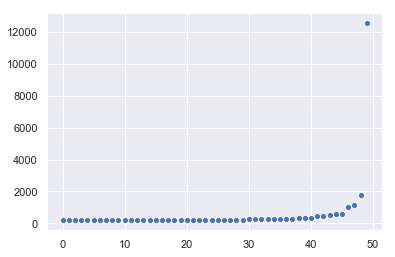

In [191]:
u.shape, s.shape, vt.shape
y = s
x = range (len(s))
ax = sns.scatterplot(x=x, y=y)